# Sequence Labeling

The classical problem in Machine Learning is to learn a classifier that can distinguish between two or more classes, i.e., that can accurately predict a class for a new object given training examples of objects already classified.

Typical examples of classification are, for instance: classifying an email as spam or not spam, classifying a movie into genres, classifying a news article into topics, sentiment analysis, etc. 

However, there is another type of prediction problems in NLP, called **Sequence Labeling**, which involve structure.

*Sequence labeling* is a type of pattern recognition task that involves the algorithmic assignment of a categorical label to each member of a sequence of observed values (https://en.wikipedia.org/wiki/Sequence_labeling).

A **common example** of a sequence labeling task is [part of speech tagging](https://en.wikipedia.org/wiki/Part-of-speech_tagging) , which seeks to assign a [part of speech](https://en.wikipedia.org/wiki/Part_of_speech) to each word in an input sentence or document.

Sequence labeling methods can be applied in many fields where the goal is to recover a data sequence that is not immediately observable (but other data that depend on the sequence are). 

Applications include:

* [Part-of-Speech (POS) tagging](https://en.wikipedia.org/wiki/Part-of-speech_tagging)
* [Named-Entity Recognition (NER)] (https://en.wikipedia.org/wiki/Named-entity_recognition)
* [Speech recognition](https://en.wikipedia.org/wiki/Speech_recognition), including [Siri](https://en.wikipedia.org/wiki/Siri)
* [Speech synthesis](https://en.wikipedia.org/wiki/Speech_synthesis)
* [Machine Translation](https://en.wikipedia.org/wiki/Machine_translation)
* [Handwriting recognition](https://en.wikipedia.org/wiki/Handwriting_recognition)
* Gene prediction
* etc.

**Reference**

* Hidden Markov Model and Naive Bayes relationship https://www.davidsbatista.net/blog/2017/11/11/HHM_and_Naive_Bayes/


## **Algorithms**

---

Most **sequence labeling algorithms** are *probabilistic* in nature, relying on [statistical inference](https://en.wikipedia.org/wiki/Statistical_inference) to find the best sequence. 

The most common statistical models in use for sequence labeling makes [a Markov assumption](https://en.wikipedia.org/wiki/Markov_chain#Discrete-time_Markov_chain), i.e. that the choice of label for a particular word is directly dependent only on the immediately adjacent labels; hence the set of labels forms a [Markov chain](https://en.wikipedia.org/wiki/Markov_chain). 

This leads naturally to the [hidden Markov model (HMM)](https://en.wikipedia.org/wiki/Hidden_Markov_model), one of the most common statistical models used for sequence labeling. 

Other common models in use are the [maximum entropy Markov model](https://en.wikipedia.org/wiki/Maximum_entropy_Markov_model) and [conditional random field](https://en.wikipedia.org/wiki/Conditional_random_field).

## Sequence Labeling Problem

A classical example of sequence labeling in NLP is **part-of-speech tagging**, in this scenario, each $w_i$ describes a word and each $t_i$ the associated part-of-speech tag of the word $w_i$ (e.g.: `noun, verb, adjective`, etc.).

Another example, is **named-entity recognition**, in which, again, each  $w_i$ describes a word and $t_i$ is a semantic label associated to that word $w_i$ (e.g.: `person, location, organization, event`, etc.).

In both examples the data consist of sequences of $(w, t)$ pairs, and we want to model our learning problem based on that sequence:

<br>

$$ P(t_1,t_2,\dots,t_m|w_1,w_2,\dots,w_m)$$

<br>

## Hidden Markov Model

---

A Hidden Markov Model (HMM) is a sequence classifier. As other machine learning algorithms it can be trained, i.e.: given labeled sequences of observations, and then using the learned parameters to assign a sequence of labels given a sequence of observations. 

### Formal Definition

A HMM can be expressed as 

$$Θ = \{O,S,\vec{Π},\vec{Φ},\mathbf{A},\mathbf{B}\}$$

where

> $O$ is *Output Space* or *Observation Space*, the set of observations $O=\{o_1,o_2,\dots,o_V\}$, where $V$ is the number of all possible observations, e.g., the number of words in a Vocabulary/Lexicon.

> $S$ is *State Space*, the set of all "hidden" states $S=\{s_1,s_2,\dots,s_K\}$, where $K$ is the number of all possible states, e.g., all possible part-of-speech tags that a word can be labeled.  

> two special states: $s_{start}$ and $s_{end}$ or $\text{<bos>}$ and $\text{<eos>}$.

and probabilities relating states and observations:

> $\vec{Π}$ is the initial probability distribution over states, 
$\vec{Π} = \begin{bmatrix} \pi_0 & \pi_1 & \cdots & \pi_K \end{bmatrix}$,
where $\pi_i = P(s_i|s_{start}), i=1,2,\dots,K$.

> $\vec{Φ}$ is the final probability distribution over states,
$\vec{Φ} = \begin{bmatrix} \phi_0 & \phi_1 & \cdots & \phi_K \end{bmatrix}$,
where $\phi_i = P(s_{end}|s_i), i=1,2,\dots,K$.

> $\mathbf{A}$ is the matrix of transition probabilities between $K$ states, i.e., a matrix with the probabilities going from state $s_i$ to $s_j$ ($i,j=1,2,\dots,K$): that is, $a_{ij}=P(s_j|s_i)$, such that 

$$\mathbf{A} = \begin{bmatrix} 
a_{11} & a_{12} & \cdots & a_{1j} & \cdots & a_{1K} \\ 
a_{21} & a_{22} & \cdots & a_{2j} & \cdots & a_{2K} \\ 
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\ 
a_{i1} & a_{i2} & \cdots & a_{ij} & \cdots & a_{iK} \\ 
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\ 
a_{K1} & a_{K2} & \cdots & a_{Kj} & \cdots & a_{KK} \\ 
\end{bmatrix}$$
<br>

> $\mathbf{B}$ is the matrix of emission probabilities that an observation being emitted (produced) from a given state: that is, $b_{ij}=P(o_j|s_i)$ for $i=1,2,\dots,K$ and $j=1,2,\dots,V$, such that 

$$\mathbf{B} = \begin{bmatrix} 
b_{11} & b_{12} & \cdots & b_{1j} & \cdots & b_{1V} \\ 
b_{21} & b_{22} & \cdots & b_{2j} & \cdots & b_{2V} \\ 
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\ 
b_{i1} & b_{i2} & \cdots & b_{ij} & \cdots & b_{iV} \\ 
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\ 
b_{K1} & b_{K2} & \cdots & b_{Kj} & \cdots & b_{KV} \\ 
\end{bmatrix}$$

<br>


## HMM for Part-of-Speech Tagging

The problem of tagging the part-of-speech associated with each word in a sentence can be modelled as a Hidden Markov Chain.

In POS tagging,

> **Output space** $O$ is the Vocabulary, $$O=\{w_1,w_2,\dots,w_V\}$$ <br> where $V$ is the number of unique words in the corpus in use.

> **State space** $S$ is the set of [part-of-speech](https://en.wikipedia.org/wiki/Part_of_speech) tags for the language in question, <br> <br>$$S=\{t_1,t_2,\dots,t_K\}$$ <br>For example, if the 17 POS tags that are defined in the Universal Dependencies tagset given below is used, $K=17$ and $S=\{\text{ADJ},\text{ADV},\dots,\text{X}\}$.

>> Universal Dependencies tag set (the most recent tag set)
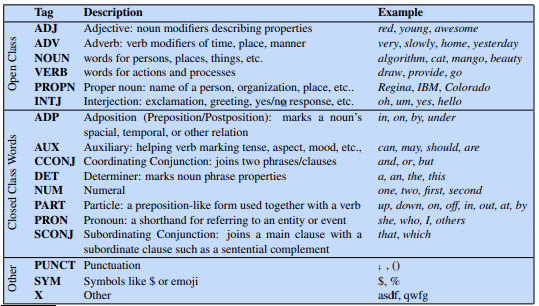

>> Penn Treebank part-of-speech tags (fine-grained)
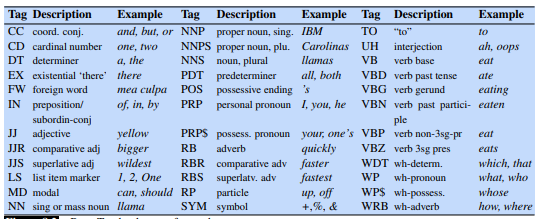

> The **initial probability distribution** over states, 
$\vec{Π} = \begin{bmatrix} \pi_0 & \pi_1 & \cdots & \pi_K \end{bmatrix}$,
where $\pi_i = P(t_i|s_{start})$ can be calculated as 
<br><br>
$$ \pi_i = P(t_i|s_{start}) = \frac{c(t_i)}{c(s_{start})}$$
<br>
That is, how often does the tag $t_i$ occurs at the start of the sentence $s_{start}$

> The **final probability distribution** over states,
$\vec{Φ} = \begin{bmatrix} \phi_0 & \phi_1 & \cdots & \phi_K \end{bmatrix}$,
where $\phi_i = P(s_{end}|t_i)$ can be calculated as
<br><br>
$$ \phi_i = P(s_{end}|t_i) = \frac{c(t_i,s_{end})}{c(s_{end})}$$
<br>
That is, how often does the tag $t_i$ occurs at the end of the sentence $s_{start}$



> **Transition probabilities**, $a_{ij}=P(t_j|t_i)$, can be calculated as
<br><br>
$$a_{ij}= =P(t_j|t_i)=\frac{c(t_i,t_j)}{c(t_i)}$$
<br>
That is, how likely does the POS tag $t_i$ transit to the POS tag $t_j$ or in other words, how likely does the POS tag $t_j$ come after the POS tag $t_i$. 

> The **emission probabilities**, $b_{ij}=P(w_j|t_i)$ can be calculated as
<br><br>
$$b_{ij}= =P(w_j|t_i)=\frac{c(t_i,w_j)}{c(t_i)}$$
<br>
That is, how likely is the POS tag $t_i$ as the tag for the word $w_j$. 


> **Implementation Note**: Handling Unseen Words.<br>
In the presence of an unseen word/observation, emission probabilities $P(w_?|t_i) = 0$ for all POS tag $t_i \in S$. 

>>There is a technique to handle this situations called *Laplace smoothing* or [*additive smoothing*](https://en.wikipedia.org/wiki/Additive_smoothing). The idea is that every state theoretically has a small emission probability of producing an unseen word, denoted by **UNK**. Every time the HMM encounters an unknown word it can therefore use the value $P(\mathbf{UNK}|t_i)$ as the emission probability.



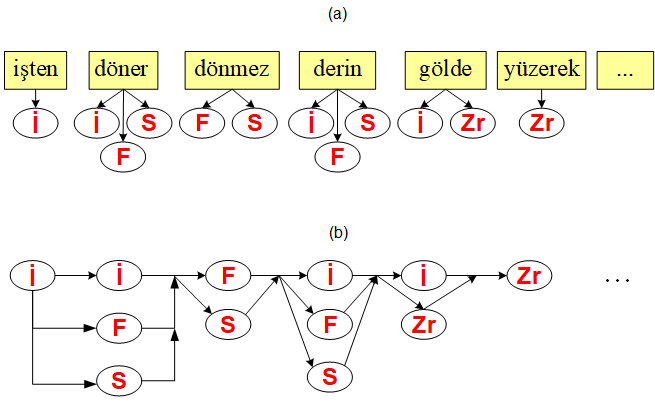

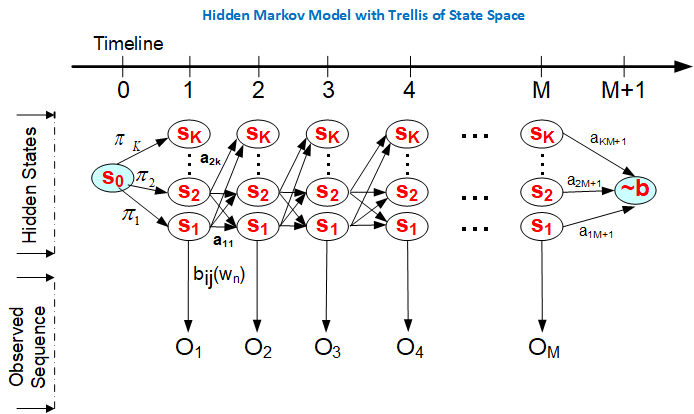

## Decoding: Finding the Hidden State Sequence for a given Output Sequence.

Given a trained HMM and a sequence of words $W_1,W_2,\dots,W_M$, where $W_m=w_j$ for $m=1,2,\dots,M$ and $w_j \in O$, we want to find the most likely sequence of tags $T_1,T_2,\dots,T_M$, where $T_m=t_i$ for $m=1,2,\dots,M$ and $t_i \in S$. 

That is,

<br>

$$
\hat{t}_{1,\dots,m} = \underset{t_1,\dots,t_m}{\mathrm{argmax}} \  P(T_1, T_2, \dots, T_m|W_1, W_2, \dots, W_n)$$
<br>

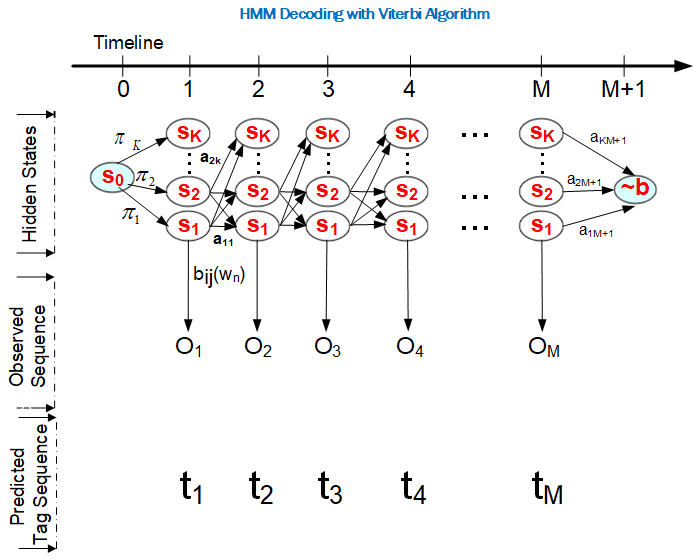

## Viterbi Algorithm

For HMM decoding, [Viterbi algorithm](https://en.wikipedia.org/wiki/Viterbi_algorithm), which finds the best state assignment to the sequence $T_1,T_2,\dots,T_M$ as a whole, can be used.

The Viterbi algorithm is a dynamic programming algorithm for obtaining the [maximum a posteriori probability estimate](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) of the most likely sequence of hidden states, called the *Viterbi path*, that results in a sequence of observed events, especially in the context of hidden Markov models.

The Viterbi algorithm maximises the likelihood of a best path up to position $m$ ending in state $t$:
<br><br>

$$\delta_{m}(T) = \underset{t_{0},\ldots,t_{m-1},t}{\max} \ \ P(t_{0},\ldots,t_{m-1},t,w_{1},\ldots,w_{m-1})$$
<br>
Viterbi algorithm makes the Markov assumption to maximize $P(t_{0},\ldots,t_{m-1},t,w_{1},\ldots,w_{m-1})$:
<br><br>

> The previous state $t_{m-1}$ entering into the current state $t$, with maximum probability:
<br><br>
$$\delta_{m}(t) = \underset{t_{i-1}}{\max} \ \ P(t \mid t_{m-1}) \cdot P(w_{m-1} \mid t_{i-1})  \cdot \delta_{m-1}(t_{m-1})$$

> The most likely previous state for each state (stores a back-trace):
<br><br>
$$\Psi_{m}(t) = \underset{t_{m-1}}{\arg\max} \ \ P(t \mid t_{m-1}) \cdot P(w_{m-1} \mid t_{m-1})  \cdot \delta_{m-1}(t_{m-1})$$

## Working Example

---

<br>

Assume that we have a HMM model with 

> state space $S=\{A,B\}$, 

> output space $O=\{x,y\}$, 

> the initial probabilities $\pi_1 = P(A|s_{start})=0.7$ and $\pi_2 = P(B|s_{start})=0.3$, 

> the final probabilities $\phi_1 = P(s_{end}|A)=0.1$ and $\phi_2 = P(s_{end}|B)=0.1$,

> transition probabilities $a_{ij}=P(s_j|s_i)$: 

$$\mathbf{A} = \begin{bmatrix} 
a_{11} & a_{12} \\ 
a_{21} & a_{21} \\ 
\end{bmatrix} = \begin{bmatrix} 
P(A|A) & P(B|A) \\ 
P(B|A) & P(B|B) \\ 
\end{bmatrix} = \begin{bmatrix} 
0.2 & 0.7 \\ 
0.7 & 0.2 \\ 
\end{bmatrix}$$
<br>

> and the emission probabilities $b_{ij}=P(o_j|s_i)$:

$$\mathbf{B} = \begin{bmatrix} 
b_{11} & b_{12} \\ 
b_{21} & b_{22} \\ 
\end{bmatrix} = \begin{bmatrix} 
P(x|A) & P(y|A) \\ 
P(x|B) & P(y|B) \\ 
\end{bmatrix} = \begin{bmatrix} 
0.4 & 0.6 \\ 
0.3 & 0.7 \\ 
\end{bmatrix}$$

<br>

--- 

Suppose that we see the output sequence $W_1=x, W_2=y, W_3=y$, or simply $x, y, y$ with $M=3$, then the Viterbi algorithm is given by:


1. Initialize 
> $\delta_{0}(t) = 1$ for the start state $s_{start}$ and
<br>
> the probability that the start state $s_{start}$ produces the begining-of-sentence (i.e. the start of output) $*S*$, $P(\text{*S*} \mid s_{start}) = 1$.

2. For each value $m = 1,\dots,M$, calculate:

> $$\delta_{m}(t) = \underset{t_{i-1}}{\max} \ \ P(t \mid t_{m-1}) \cdot P(w_{m-1} \mid t_{i-1})  \cdot \delta_{m-1}(t_{m-1})$$

> $$\Psi_{m}(t) = \underset{t_{m-1}}{\arg\max} \ \ P(t \mid t_{m-1}) \cdot P(w_{m-1} \mid t_{m-1})  \cdot \delta_{m-1}(t_{m-1})$$

3. Finally, fill out the end state of the trellis (position M + 1) using the rules in (2) above.


**HMM Trellis at m=0**

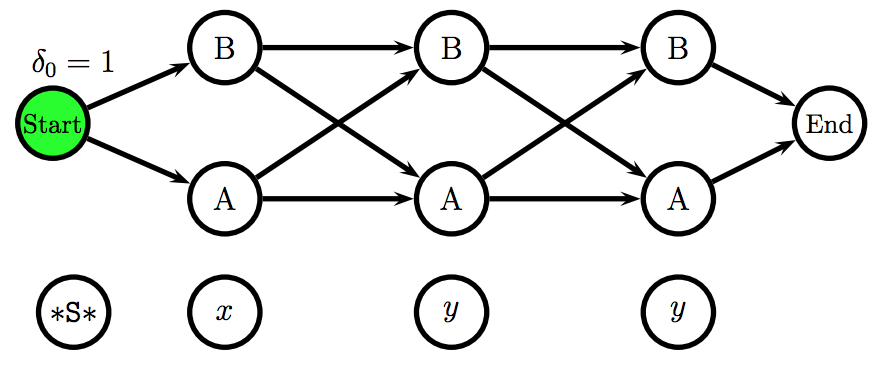

---

**Step 2**: for m=1,2,3 calculate:

$m=1$

> $\delta_{m}(t) = \underset{T_{m-1}}{\max} \ \ P(T_m \mid T_{m-1}) \cdot P(W_{m-1} \mid T_{m-1})  \cdot \delta_{m-1}(T_{m-1})$

>> $\delta_{1}(A) = \underset{T_0}{\max} \ \ P(A \mid s_{start}) \cdot P(\text{*S*} \mid s_{start})  \cdot \delta_{0}(s_{start})=0.7 \times 1 \times 1$
<br>

>> $\delta_{1}(B) = \underset{T_0}{\max} \ \ P(B \mid s_{start}) \cdot P(\text{*S*} \mid s_{start})  \cdot \delta_{0}(s_{start})= 0.3 \times 1 \times 1$

<br>

> $\Psi_{m}(t) = \underset{T_{m-1}}{\arg\max} \ \ P(T_m \mid T_{m-1}) \cdot P(W_{m-1} \mid T_{m-1})  \cdot \delta_{m-1}(T_{m-1})$

>> $\Psi_{1}(A) = \underset{T_0}{\arg\max} \ \ P(A \mid s_{start}) \cdot P(\text{*S*} \mid s_{start})  \cdot \delta_{0}(s_{start}) = 0.7 \times 1 \times 1$

>>> The most likely previous state for state $A$, $\Psi_{1}(A) ⇒ s_{start}$ (shown in the trellis below as a backward, red curved arrow)

>> $\Psi_{1}(B) = \underset{T_0}{\arg\max} \ \ P(B \mid s_{start}) \cdot P(\text{*S*} \mid s_{start})  \cdot \delta_{0}(s_{start}) = 0.3 \times 1 \times 1$

>>> The most likely previous state for state $A$, $\Psi_{1}(B) ⇒ s_{start}$

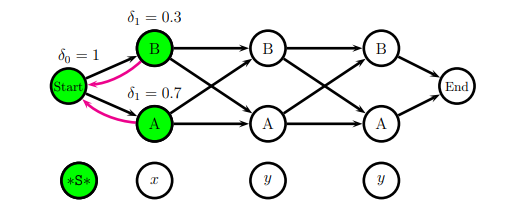

---

for $m=2$, $W_1=x$

> $\delta_{2}(T) = \underset{T_1}{\max} \ \ P(T_2 \mid T_1) \cdot P(W_1 \mid T_1)  \cdot \delta_{1}(T_1)$

>> $\begin{equation}
\begin{split}
\delta_{2}(A) &= \underset{T_1}{\max} \ \ P(A \mid T_1) \cdot P(x \mid T_1)  \cdot \delta_{1}(T_1) \\
& = \max \left(\ P(A \mid A) \cdot P(x \mid A)  \cdot \delta_{1}(A), \ P(A \mid B) \cdot P(x \mid B)  \cdot \delta_{1}(B) \right) \\
& = \max \left(\ (0.2 \times 0.4 \times 0.7), \ (0.7 \times 0.3 \times 0.3) \ \right) \\
& = \max \left(\ 0.056, \ 0.063 \ \right) \\
& = 0.063
\end{split}
\end{equation}
$

<br>

>> $\begin{equation}
\begin{split}
\delta_{2}(B) &= \underset{T_1}{\max} \ \ P(B \mid T_1) \cdot P(x \mid T_1)  \cdot \delta_{1}(T_1) \\
& = \max \left(\ P(B \mid A) \cdot P(x \mid A)  \cdot \delta_{1}(A), \ P(B \mid B) \cdot P(x \mid B)  \cdot \delta_{1}(B) \right) \\
& = \max \left(\ (0.7 \times 0.4 \times 0.7), \ (0.2 \times 0.3 \times 0.3) \ \right) \\
& = \max \left(\ 0.196, \ 0.018 \ \right) \\
& = 0.196
\end{split}
\end{equation}
$

<br>

> $\Psi_{2}(T) = \underset{T_1}{\arg\max} \ \ P(T_m \mid T_{m-1}) \cdot P(W_{m-1} \mid T_{m-1})  \cdot \delta_{1}(T_1)$

>> $\begin{equation}
\begin{split}
\Psi_{2}(A) &= \underset{T_1}{\arg\max} \ \ P(A \mid T_1) \cdot P(x \mid T_1)  \cdot \delta_{1}(T_1) \\
& = \arg\max \left(\ P(A \mid A) \cdot P(x \mid A)  \cdot \delta_{1}(A), \ P(A \mid B) \cdot P(x \mid B)  \cdot \delta_{1}(B) \right) \\
& = \arg\max \left(\ (0.2 \times 0.4 \times 0.7), \ (0.7 \times 0.3 \times 0.3) \ \right) \\
& = \arg\max \left(\ 0.056, \ 0.063 \ \right) \\
& ⇒ B
\end{split}
\end{equation}
$

>> $\begin{equation}
\begin{split}
\Psi_{2}(B) &= \underset{T_1}{\max} \ \ P(B \mid T_1) \cdot P(x \mid T_1)  \cdot \delta_{1}(T_1) \\
& = \arg\max \left(\ P(B \mid A) \cdot P(x \mid A)  \cdot \delta_{1}(A), \ P(B \mid B) \cdot P(x \mid B)  \cdot \delta_{1}(B) \right) \\
& = \arg\max \left(\ (0.7 \times 0.4 \times 0.7), \ (0.2 \times 0.3 \times 0.3) \ \right) \\
& = \arg\max \left(\ 0.196, \ 0.018 \ \right) \\
& ⇒ A
\end{split}
\end{equation}
$


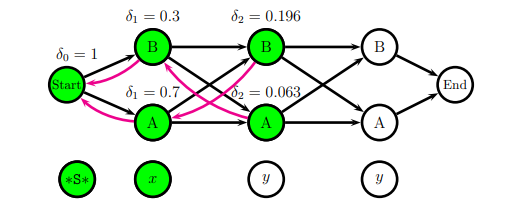

---

for $m=3$, $W_2=y$

> $\delta_{3}(T) = \underset{T_2}{\max} \ \ P(T_3 \mid T_2) \cdot P(W_2 \mid T_2)  \cdot \delta_{2}(T_2)$

>> $\begin{equation}
\begin{split}
\delta_{3}(A) &= \underset{T_2}{\max} \ \ P(A \mid T_2) \cdot P(y \mid T_2)  \cdot \delta_{2}(T_2) \\
& = \max \left(\ (0.2 \times 0.6 \times 0.063), \ (0.7 \times 0.7 \times 0.196) \ \right) \\
& = \max \left(\ 0.00756, \  0.09604\ \right) \\
& = 0.096
\end{split}
\end{equation}
$

<br>

>> $\begin{equation}
\begin{split}
\delta_{3}(B) &= \underset{T_1}{\max} \ \ P(B \mid T_2) \cdot P(y \mid T_2)  \cdot \delta_{2}(T_2) \\
& = \max \left(\ (0.7 \times 0.6 \times 0.063), \ (0.2 \times 0.7 \times 0.196) \ \right) \\
& = \max \left(\ 0.02646, \  0.02744\ \right) \\
& = 0.027
\end{split}
\end{equation}
$

<br>

> $\Psi_{3}(T) = \underset{T_2}{\arg\max} \ \ P(T_3 \mid T_2) \cdot P(W_2 \mid T_2)  \cdot \delta_{2}(T_2)$

>> $\begin{equation}
\begin{split}
\Psi_{3}(A) &= \underset{T_2}{\arg\max} \ \ P(A \mid T_2) \cdot P(x \mid T_2)  \cdot \delta_{2}(T_2) \\
& = \arg\max \left(\ 0.00756, \  0.09604 \ \right) \\
& ⇒ B
\end{split}
\end{equation}
$

>> $\begin{equation}
\begin{split}
\Psi_{3}(B) &= \underset{T_2}{\max} \ \ P(B \mid T_2) \cdot P(x \mid T_2)  \cdot \delta_{2}(T_2) \\
& = \arg\max \left(\ 0.02646, \  0.02744 \ \right) \\
& ⇒ B
\end{split}
\end{equation}
$


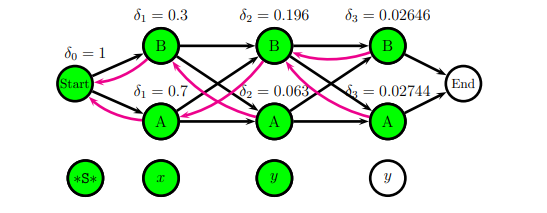

---

for the end state $s_{end}$, $m=4$, $W_3=y$

> $\begin{equation}
\begin{split}
\delta_{4}(s_{end}) &= \underset{T_3}{\max} \ \ P(s_{end} \mid T_3) \cdot P(y \mid T_3)  \cdot \delta_{3}(T_3) \\
& = \max \left(\ (0.1 \times 0.6 \times 0.096), \ (0.1 \times 0.7 \times 0.027) \ \right) \\
& = \max \left(\ 0.00576, \  0.00189\ \right) \\
& = 0.00576
\end{split}
\end{equation}
$

<br>

> $\begin{equation}
\begin{split}
\Psi_{4}(A) &= \underset{T_3}{\arg\max} \ \ P(s_{end} \mid T_3) \cdot P(y \mid T_3)  \cdot \delta_{3}(T_3) \\
& = \arg\max \left(\ 0.00576, \  0.00189 \ \right) \\
& ⇒ A
\end{split}
\end{equation}
$

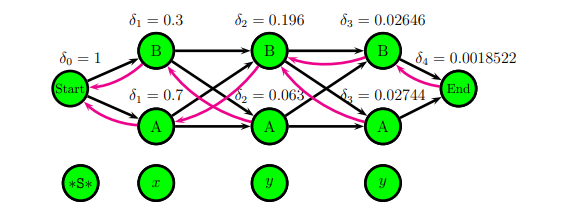

---

**Result**

> Backtrace: $s_{end} ⇒ A ⇒ B ⇒ A ⇒ s_{start}$

> Reverse of backtrace = the most probable state sequence: ABA

> $P(ABA \mid xyy) = \delta_4(s_{end}) = 0.0576$

# **Home Work 2**:

Implement the Viterbi Algorithm.

In [22]:
def viterbi(O, S, initial_p, A, B):
  most_likely_sequence = [];

  # Delta is the set of probabilities matrix 
  Delta = [[0] * len(S) for _ in range(len(O))]

  # Psi is the set of backpointers matrix 
  Psi = [[0] * len(S) for _ in range(len(O))]

  # Initialization of Delta
  # δ1(s)=maxT0  P(s∣Sstart)⋅P(*S*∣Sstart)⋅δ0(Sstart)
  Delta[0] = [initial_p[s] * 1.0 * 1.0 for s in range(len(S))]

  # for every time step t in the observation sequence
  for t in range(1, len(O)):
    # for every state s in S
    for s in range(len(S)):
      probs = [A[sP][s] * B[sP][O[t-1]] * Delta[t-1][sP] for sP in range(len(S))]
      
      ## Iteration 1 :  δ2(s)=maxT1  P(s∣T1)⋅P(w∣T1)⋅δ1(T1)
      ## Iteration 2 :  δ3(s)=maxT2  P(s∣T2)⋅P(w∣T2)⋅δ2(T2)
      Delta[t][s] = max(probs)
      
      ## Iteration 1 :  ψ2(s)=argmaxT1  P(s∣T1)⋅P(w∣T1)⋅δ1(T1)
      ## Iteration 2 :  Ψ3(s)=argmaxT2  P(s∣T2)⋅P(w∣T2)⋅δ2(T2)
      Psi[t-1][s] = probs.index(max(probs))

  # Find the most probable final state
  probs = [1.0 * B[sP][O[-1]] * Delta[-1][sP] for sP in range(len(S))]
  Psi[-1] = probs.index(max(probs))

  # Backtrace to find the most probable state sequence
  backtrace = []
  backtrace.append(Psi.pop())
  for i in range(len(Psi)-1, -1, -1):
    backtrace.append(Psi.pop()[backtrace[len(Psi)-i-1]])
  
  print("Backtrace: ", [dict[i] for i in backtrace])
  
  # Reverse of backtrace
  most_likely_sequence = backtrace[::-1]

  return most_likely_sequence;

############################################################################################################
# Example:
############################################################################################################

O = [0,1,1] 
# where 0 represents "x" and 1 represents "y"

S = [0,1]
# where 0 represents state "A" and 1 represents state "B" (such as noun and verb)

dict = {0: "A", 1: "B"}
# dict is for beautified printing of states

initial_p = [0.7, 0.3]
# the initial probability of each state

A = [[0.2, 0.7], [0.7, 0.2]] 
# A[i][j] is the probability of transitioning from state i to state j
# Ex: [[P(A|A), P(B|A)] , [P(B|A), P(B|B)]]

B = [[0.4, 0.6], [0.3, 0.7]] 
# B[i][j] is the probability of emitting observation j from state i
# Ex: [[P(x|A), P(y|A)] , [P(x|B), P(y|B)]]

print("The most likely sequence is: ", [dict[i] for i in viterbi(O, S, initial_p, A, B)])

Backtrace:  ['A', 'B', 'A']
The most likely sequence is:  ['A', 'B', 'A']
